In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
ds = sg.load_dataset("../data/Gorilla_gorilla_gorilla")
ds

<xarray.Dataset> Size: 6GB
Dimensions:               (variants: 21463034, samples: 46, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/16)
    call_genotype         (variants, samples, ploidy) int8 2GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 2GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 987MB dask.array<chunksize=(1000, 46), meta=np.ndarray>
    contig_id             (contigs) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    contig_length         (contigs) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_filter        (variants, filters) bool 43MB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [3]:
missing_rate_inds = ds.call_genotype_mask[:,:,1].sum(axis=0).values/ds.call_genotype_mask[:,:,1].count(axis=0).values
ds = ds.isel(samples=(missing_rate_inds <= 0.1))
ds["sample_cohort"] = xr.DataArray(range(len(ds.samples)), dims="samples")
ds

<xarray.Dataset> Size: 3GB
Dimensions:               (variants: 21463034, samples: 21, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/17)
    call_genotype         (variants, samples, ploidy) int8 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 451MB dask.array<chunksize=(1000, 21), meta=np.ndarray>
    contig_id             (contigs) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    contig_length         (contigs) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    sample_cohort         (samples) int64 168B 0 1 2 3 4 5 ... 15 16 17 18 19 20
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [4]:
ds.contig_length.values, ds.contig_id.values

(array([2.43847345e+08, 2.15253457e+08, 2.15373162e+08, 1.95332687e+08,
        1.99452338e+08, 1.70803427e+08, 1.58533252e+08, 1.50804130e+08,
        1.47876701e+08, 1.54228409e+08, 1.50248535e+08, 1.45906006e+08,
        1.34695396e+08, 1.32018348e+08, 1.31692671e+08, 1.07915467e+08,
        1.16054869e+08, 1.31347499e+08, 1.20452965e+08, 8.03129280e+07,
        8.44432190e+07, 5.95073140e+07, 5.47697970e+07, 1.77558554e+08,
        6.74057480e+07, 1.64120000e+04]),
 array(['NC_073224.2', 'NC_086017.1', 'NC_073227.2', 'NC_073228.2',
        'NC_073229.2', 'NC_073230.2', 'NC_073231.2', 'NC_073232.2',
        'NC_073233.2', 'NC_073234.2', 'NC_073235.2', 'NC_073236.2',
        'NC_073237.2', 'NC_073238.2', 'NC_073239.2', 'NC_073240.2',
        'NC_073241.2', 'NC_073242.2', 'NC_073243.2', 'NC_073244.2',
        'NC_073245.2', 'NC_073246.2', 'NC_086018.1', 'NC_073247.2',
        'NC_073248.2', 'NC_011120.1'], dtype=object))

In [5]:
#Guess is that last chrom is chrX. Note that there actually also is a contig 24 (Y) and contig 25 (Mitochondria)
pd.Series(ds.variant_contig.values).value_counts()

0     1627541
2     1588843
1     1498730
4     1332382
5     1199257
3     1178356
6     1153274
7     1048980
8     1020183
10     987279
9      973588
11     865730
12     854911
13     791558
18     763742
14     695159
23     666044
16     612986
15     564824
17     555624
20     466439
19     417460
21     328392
22     271752
Name: count, dtype: int64

In [9]:
# You have to be very aware of dimensions, as contigs and variants aren't linked as standard. 
# So if you want to subset to specific contig(s) to analyze variants, do this:
ds_X = ds.set_index(variants=("variant_contig", "variant_position")).sel(variant_contig=(23))

In [10]:
ds_X.contig_length.values

array([2.43847345e+08, 2.15253457e+08, 2.15373162e+08, 1.95332687e+08,
       1.99452338e+08, 1.70803427e+08, 1.58533252e+08, 1.50804130e+08,
       1.47876701e+08, 1.54228409e+08, 1.50248535e+08, 1.45906006e+08,
       1.34695396e+08, 1.32018348e+08, 1.31692671e+08, 1.07915467e+08,
       1.16054869e+08, 1.31347499e+08, 1.20452965e+08, 8.03129280e+07,
       8.44432190e+07, 5.95073140e+07, 5.47697970e+07, 1.77558554e+08,
       6.74057480e+07, 1.64120000e+04])

In [11]:
ds_X.call_genotype[:,20][:20].values

array([[-1, -1],
       [-1, -1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [-1, -1],
       [-1, -1],
       [ 0,  0],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 0,  0],
       [ 0,  0]], dtype=int8)

In [12]:
cov_summaries = glob.glob("/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/Gorilla_gorilla_gorilla/cov/*")

In [13]:
df_l = []
for p in cov_summaries:
    print(p.split("/")[-1].split(".")[0])
    df = pd.read_csv(p, sep="\t", names=["Name", "Contig", "start", "end", "length", "?", "coverage"])
    df["ID"] = p.split("/")[-1].split(".")[0]
    df_l.append(df)
df_cov = pd.concat(df_l)

SAMN01920495
PD_0183
SAMEA868694
PD_0184
SAMN01920492
SAMEA112772575
SAMEA112772572
SAMEA112772547
SAMEA112772591
SAMN01920478
SAMEA112772549
SAMEA112772558
SAMEA112772589
SAMEA112772551
SAMN35877944
SAMEA112772580
SAMEA112772556
SAMEA112772587
SAMN01920503
SAMEA112772563
SAMEA112772564
SAMN01920483
PD_0195
PD_0192
SAMN01920484
SAMEA112772548
SAMN01920477
SAMEA112772590
SAMN01920479
SAMEA112772573
SAMEA112772574
SAMEA868692
SAMN01920493
PD_0185
PD_0182
SAMN01920494
SAMEA868695
SAMN01920485
PD_0193
PD_0194
SAMN01920482
SAMEA112772565
SAMN01920502
SAMEA112772562
SAMN02333813
SAMEA112772557
SAMEA112772586
SAMEA112772550
SAMN35877945
SAMEA112772581
SAMEA112772559
SAMEA112772588
PD_0197
SAMN01920481
SAMEA112772568
SAMN01920486
PD_0190
SAMN01920488
SAMN01920501
SAMEA112772561
SAMEA112772566
SAMEA112772553
SAMEA112772582
SAMEA112772554
SAMEA112772585
SAMEA112772594
SAMEA112772577
PD_0188
SAMEA112772570
SAMN01920499
SAMEA868698
PD_0181
SAMN01920497
SAMEA868696
SAMEA112772579
SAMN01920490
PD_01

In [14]:
df_cov["Contig_type"] = ["chrX" if x == "postPAR1" else "non-X" for x in df_cov.Name]

<Axes: xlabel='coverage', ylabel='Count'>

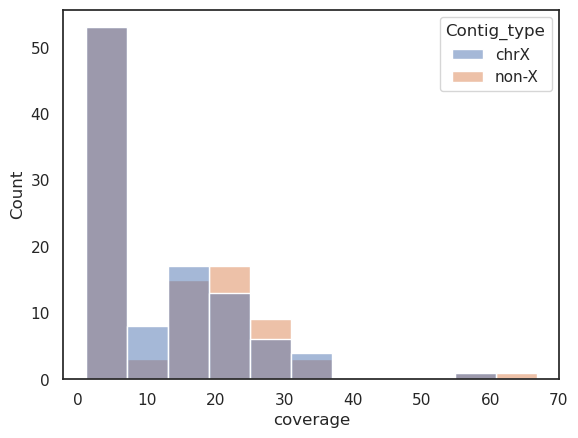

In [15]:
sns.histplot(df_cov.groupby(["ID", "Contig_type"])["coverage"].median().reset_index(), x="coverage", hue="Contig_type")

In [16]:
df_group = df_cov.groupby(["ID", "Contig_type"])["coverage"].median().reset_index()
non_X = df_group.loc[df_group.Contig_type == "non-X"]
df_cov["aut_cov"] = df_cov.ID.map(dict(zip(non_X.ID, non_X.coverage)))
df_cov["relative_cov"] = df_cov.coverage/df_cov.aut_cov

In [17]:
df_cov

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov
0,NC_073224.2,NC_073224.2,1,243847345,239752752,4203819301,17.53400,SAMN01920495,non-X,17.83560,0.983090
1,NC_086017.1,NC_086017.1,1,215253457,212720055,3966143448,18.64490,SAMN01920495,non-X,17.83560,1.045376
2,NC_073227.2,NC_073227.2,1,215373162,210274335,4141899393,19.69760,SAMN01920495,non-X,17.83560,1.104398
3,NC_073228.2,NC_073228.2,1,195332687,192154248,3471288490,18.06510,SAMN01920495,non-X,17.83560,1.012868
4,NC_073229.2,NC_073229.2,1,199452338,194795376,3670749101,18.84410,SAMN01920495,non-X,17.83560,1.056544
...,...,...,...,...,...,...,...,...,...,...,...
23,prePAR1,NC_073247.2,1,9544188,634357,1212259,1.91100,SAMEA112772592,non-X,1.66473,1.147934
24,PAR1,NC_073247.2,9544189,12039748,1290435,2365251,1.83291,SAMEA112772592,non-X,1.66473,1.101025
25,postPAR1,NC_073247.2,12039749,177558554,89236689,150482758,1.68633,SAMEA112772592,chrX,1.66473,1.012975
26,NC_073248.2,NC_073248.2,1,67405748,2057842,3286700,1.59716,SAMEA112772592,non-X,1.66473,0.959411


In [18]:
(177558554-12039749)/89236689
#I'm unsure what the column I have termed "length" is. Maybe the number of callable bases?

1.8548290714820224

In [19]:
df_cov.loc[df_cov.Contig_type == "chrX"]

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov
25,postPAR1,NC_073247.2,12039749,177558554,163068284,3045337189,18.67520,SAMN01920495,chrX,17.83560,1.047074
25,postPAR1,NC_073247.2,12039749,177558554,164813287,4856860223,29.46890,PD_0183,chrX,29.93370,0.984472
25,postPAR1,NC_073247.2,12039749,177558554,8248939,14625925,1.77307,SAMEA868694,chrX,1.82136,0.973487
25,postPAR1,NC_073247.2,12039749,177558554,163232980,1854717774,11.36240,PD_0184,chrX,21.22200,0.535407
25,postPAR1,NC_073247.2,12039749,177558554,162806342,2875447802,17.66180,SAMN01920492,chrX,16.90380,1.044842
...,...,...,...,...,...,...,...,...,...,...,...
25,postPAR1,NC_073247.2,12039749,177558554,186849,308567,1.65142,SAMEA112772571,chrX,1.64249,1.005437
25,postPAR1,NC_073247.2,12039749,177558554,162829158,1809837499,11.11490,SAMN01920498,chrX,11.05870,1.005082
25,postPAR1,NC_073247.2,12039749,177558554,2016517,3992766,1.98003,SAMEA112772576,chrX,2.05533,0.963364
25,postPAR1,NC_073247.2,12039749,177558554,164769166,3628451390,22.02140,PD_0189,chrX,21.77460,1.011334


<Axes: xlabel='relative_cov', ylabel='Count'>

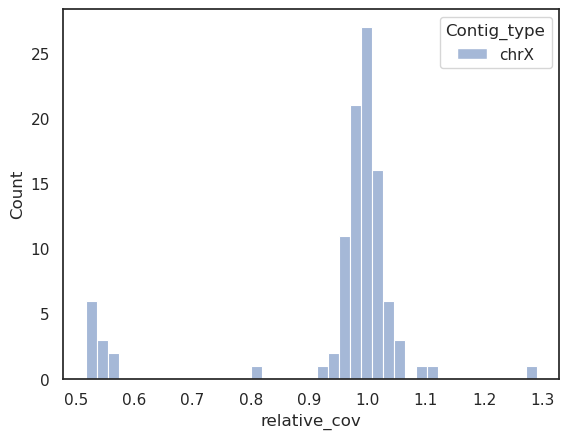

In [20]:
sns.histplot(df_cov.loc[df_cov.Contig_type == "chrX"], x="relative_cov", hue="Contig_type")

[(-2.0, 100.0), (-1.0, 5.0)]

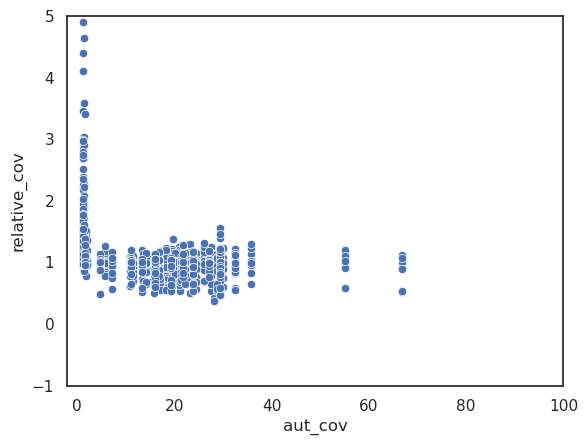

In [21]:
g = sns.scatterplot(df_cov.loc[df_cov.Contig != "NC_011120.1"], y="relative_cov", x="aut_cov")
g.set(xlim=(-2, 100), ylim=(-1, 5))

In [22]:
x_cov_determination = df_cov.loc[df_cov.Contig_type == "chrX"]
x_cov_determination["sex"] = ["F" if x >= 0.75 else "M" for x in x_cov_determination.relative_cov]

/tmp/60261951/ipykernel_2555102/3904995196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cov_determination["sex"] = ["F" if x >= 0.75 else "M" for x in x_cov_determination.relative_cov]


In [23]:
x_cov_determination.sex.value_counts()

sex
F    91
M    11
Name: count, dtype: int64

In [24]:
# The strangest individual is PD_0187, with a ratio of 0.8
x_cov_determination.loc[(x_cov_determination.sex == "F") & (x_cov_determination.coverage >= 10)]

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov,sex
25,postPAR1,NC_073247.2,12039749,177558554,163068284,3045337189,18.6752,SAMN01920495,chrX,17.8356,1.047074,F
25,postPAR1,NC_073247.2,12039749,177558554,164813287,4856860223,29.4689,PD_0183,chrX,29.9337,0.984472,F
25,postPAR1,NC_073247.2,12039749,177558554,162806342,2875447802,17.6618,SAMN01920492,chrX,16.9038,1.044842,F
25,postPAR1,NC_073247.2,12039749,177558554,164331886,2838529475,17.2732,SAMN01920478,chrX,16.9586,1.018551,F
25,postPAR1,NC_073247.2,12039749,177558554,165470879,9288798369,56.1355,SAMN35877944,chrX,55.1653,1.017587,F
25,postPAR1,NC_073247.2,12039749,177558554,163319375,2217565736,13.5781,SAMN01920503,chrX,13.2428,1.025319,F
25,postPAR1,NC_073247.2,12039749,177558554,163842809,3255732036,19.8711,SAMN01920483,chrX,20.4510,0.971644,F
25,postPAR1,NC_073247.2,12039749,177558554,163115793,3337675186,20.4620,PD_0195,chrX,20.9575,0.976357,F
25,postPAR1,NC_073247.2,12039749,177558554,163600948,4154854609,25.3963,SAMN01920484,chrX,26.1234,0.972167,F
25,postPAR1,NC_073247.2,12039749,177558554,164381866,2787676537,16.9585,SAMN01920477,chrX,16.6287,1.019833,F


In [25]:
x_cov_determination.loc[(x_cov_determination.sex == "M") & (x_cov_determination.coverage >= 10)]

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov,sex
25,postPAR1,NC_073247.2,12039749,177558554,163232980,1854717774,11.3624,PD_0184,chrX,21.2220,0.535407,M
25,postPAR1,NC_073247.2,12039749,177558554,163097791,2405703129,14.7501,PD_0192,chrX,27.5785,0.534841,M
25,postPAR1,NC_073247.2,12039749,177558554,163221700,2227772407,13.6488,SAMN01920482,chrX,24.3468,0.560599,M
25,postPAR1,NC_073247.2,12039749,177558554,163768757,5653363409,34.5204,SAMN35877945,chrX,66.7636,0.517054,M
25,postPAR1,NC_073247.2,12039749,177558554,162815674,2542485841,15.6157,PD_0197,chrX,29.2973,0.533008,M
25,postPAR1,NC_073247.2,12039749,177558554,162400589,2473940156,15.2336,PD_0198,chrX,28.7907,0.529115,M
25,postPAR1,NC_073247.2,12039749,177558554,162319675,2051682736,12.6398,PD_0191,chrX,23.7409,0.532406,M
25,postPAR1,NC_073247.2,12039749,177558554,161315715,1690162648,10.4774,SAMN01920491,chrX,19.3062,0.542696,M


In [26]:
#Only using 3 chroms for aut for computational speed
ds_aut = ds.isel(contigs=[13, 14, 15]) #ds.isel(contigs=(slice(0, 23)))
np.unique(ds_aut.contigs.values)

array([0, 1, 2])

In [27]:
ds_aut.contig_length.values

array([1.32018348e+08, 1.31692671e+08, 1.07915467e+08])

Now that I have understood Vasili's coverage work, it is time to check how well it holds up in the sgkit zarr files.

Notes on how to handle the diversity investigation in windows.
For this first approach, I will just use individual heterozygosity to verify the X/aut ratio

In [28]:
df = pd.DataFrame()
ds_i = ds.set_index(variants=("variant_contig", "variant_position"))
for c in [13, 14, 15, 23]:
    ds_s = ds_i.sel(variant_contig=(c))
    ds_s = ds_s.sel(contigs=(c))
    ds_s = sg.individual_heterozygosity(ds_s)
    total_het = ds_s["call_heterozygosity"].sum(axis=0).values
    df["contig_{}_total_het".format(c)] = total_het
    df["het_per_basepair_{}".format(c)] = total_het/int(ds_s["contig_length"].values)
    df["het_per_called_site_{}".format(c)] = total_het/len(ds_s["call_heterozygosity"])

/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/sgkit/utils.py:151: DimensionWarning: Dimensions ('variant_position', 'samples', 'ploidy') do not match ('variants', 'samples', 'ploidy')
  warnings.warn(f"Dimensions {a.dims} do not match {dims}", DimensionWarning)
/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/sgkit/utils.py:151: DimensionWarning: Dimensions ('variant_position', 'samples', 'ploidy') do not match ('variants', 'samples', 'ploidy')
  warnings.warn(f"Dimensions {a.dims} do not match {dims}", DimensionWarning)
/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/sgkit/utils.py:151: DimensionWarning: Dimensions ('variant_position', 'samples', 'ploidy') do not match ('variants', 'samples', 'ploidy')
  warnings.warn(f"Dimensions {a.dims} do not match {dims}", DimensionWarning)
/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/sgkit/utils.py:151: DimensionWarning: Dimensions ('v

In [29]:
df

,contig_13_total_het,het_per_basepair_13,het_per_called_site_13,contig_14_total_het,het_per_basepair_14,het_per_called_site_14,contig_15_total_het,het_per_basepair_15,het_per_called_site_15,contig_23_total_het,het_per_basepair_23,het_per_called_site_23
0,161297.0,0.001222,0.203772,151757.0,0.001152,0.218305,123724.0,0.001146,0.219049,145845.0,0.000821,0.218972
1,177474.0,0.001344,0.224208,154042.0,0.001170,0.221592,123264.0,0.001142,0.218234,144986.0,0.000817,0.217682
2,173287.0,0.001313,0.218919,135410.0,0.001028,0.194790,123217.0,0.001142,0.218151,150952.0,0.000850,0.226640
3,183359.0,0.001389,0.231643,155275.0,0.001179,0.223366,127566.0,0.001182,0.225851,159664.0,0.000899,0.239720
4,175996.0,0.001333,0.222341,156666.0,0.001190,0.225367,128091.0,0.001187,0.226780,7609.0,0.000043,0.011424
5,176293.0,0.001335,0.222716,156315.0,0.001187,0.224862,123029.0,0.001140,0.217818,124089.0,0.000699,0.186308
6,183459.0,0.001390,0.231769,156369.0,0.001187,0.224940,129372.0,0.001199,0.229048,160918.0,0.000906,0.241603
7,181884.0,0.001378,0.229780,152628.0,0.001159,0.219558,129983.0,0.001204,0.230130,165618.0,0.000933,0.248659
8,184463.0,0.001397,0.233038,159932.0,0.001214,0.230065,135630.0,0.001257,0.240128,167592.0,0.000944,0.251623
9,182711.0,0.001384,0.230825,162013.0,0.001230,0.233059,127593.0,0.001182,0.225899,150098.0,0.000845,0.225357


In [30]:
df = pd.DataFrame()
for c in [13, 14, 15, 23]:
    ds_s = ds_i.sel(variant_contig=(c))
    ds_s = ds_s.sel(contigs=(c))
    ds_s = ds_s.sel(variant_position=slice(12039749, None))
    ds_s = sg.individual_heterozygosity(ds_s)
    total_het = ds_s["call_heterozygosity"].sum(axis=0).values
    df["contig_{}_total_het".format(c)] = total_het
    df["het_per_basepair_{}".format(c)] = total_het/int(ds_s["contig_length"].values)
    df["het_per_called_site_{}".format(c)] = total_het/len(ds_s["call_heterozygosity"])

/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/sgkit/utils.py:151: DimensionWarning: Dimensions ('variant_position', 'samples', 'ploidy') do not match ('variants', 'samples', 'ploidy')
  warnings.warn(f"Dimensions {a.dims} do not match {dims}", DimensionWarning)
/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/sgkit/utils.py:151: DimensionWarning: Dimensions ('variant_position', 'samples', 'ploidy') do not match ('variants', 'samples', 'ploidy')
  warnings.warn(f"Dimensions {a.dims} do not match {dims}", DimensionWarning)
/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/sgkit/utils.py:151: DimensionWarning: Dimensions ('variant_position', 'samples', 'ploidy') do not match ('variants', 'samples', 'ploidy')
  warnings.warn(f"Dimensions {a.dims} do not match {dims}", DimensionWarning)
/home/eriks/miniconda3/envs/primatediversity2/lib/python3.12/site-packages/sgkit/utils.py:151: DimensionWarning: Dimensions ('v

In [31]:
df

,contig_13_total_het,het_per_basepair_13,het_per_called_site_13,contig_14_total_het,het_per_basepair_14,het_per_called_site_14,contig_15_total_het,het_per_basepair_15,het_per_called_site_15,contig_23_total_het,het_per_basepair_23,het_per_called_site_23
0,160266.0,0.001214,0.204856,151194.0,0.001148,0.218813,123571.0,0.001145,0.219086,138635.0,0.000781,0.217855
1,175556.0,0.001330,0.224401,152844.0,0.001161,0.221201,123230.0,0.001142,0.218482,138223.0,0.000778,0.217208
2,172616.0,0.001308,0.220643,134553.0,0.001022,0.194730,123010.0,0.001140,0.218092,143652.0,0.000809,0.225739
3,183059.0,0.001387,0.233991,154537.0,0.001173,0.223651,127361.0,0.001180,0.225806,152462.0,0.000859,0.239583
4,175382.0,0.001328,0.224178,156174.0,0.001186,0.226020,127888.0,0.001185,0.226740,0.0,0.000000,0.000000
5,174685.0,0.001323,0.223287,155359.0,0.001180,0.224841,122958.0,0.001139,0.217999,116719.0,0.000657,0.183416
6,181818.0,0.001377,0.232405,155209.0,0.001179,0.224624,129173.0,0.001197,0.229018,153987.0,0.000867,0.241980
7,181129.0,0.001372,0.231524,151659.0,0.001152,0.219486,129834.0,0.001203,0.230190,158028.0,0.000890,0.248330
8,183535.0,0.001390,0.234600,158890.0,0.001207,0.229951,135427.0,0.001255,0.240106,160456.0,0.000904,0.252145
9,181731.0,0.001377,0.232294,161006.0,0.001223,0.233013,127570.0,0.001182,0.226176,143026.0,0.000806,0.224755


In [48]:
ds_s.sample_id.values

array(['PD_0180', 'PD_0181', 'PD_0182', 'PD_0183', 'PD_0184', 'PD_0185',
       'PD_0186', 'PD_0188', 'PD_0189', 'PD_0190', 'PD_0191', 'PD_0192',
       'PD_0193', 'PD_0194', 'PD_0195', 'PD_0196', 'PD_0197', 'PD_0198',
       'SAMN01920484', 'SAMN01920485', 'SAMN01920489'], dtype=object)

<Axes: xlabel='het_per_basepair_14', ylabel='X_12_ratio'>

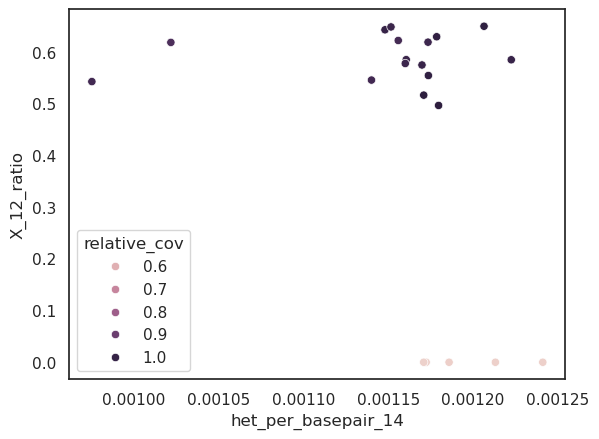

In [51]:
df["X_12_ratio"] = df["het_per_basepair_23"]/df["het_per_basepair_13"]
df["ID"] = ds_s.sample_id.values
df["relative_cov"] = df.ID.map(dict(zip(x_cov_determination.ID, x_cov_determination.relative_cov)))
sns.scatterplot(df, y="X_12_ratio", x="het_per_basepair_14", hue="relative_cov")

Sgkit handles any missing data by setting the whole window to nan.
My preferred approach would be for them to ignore any missing sites.
Update: It only happens if there are sites with no data, so a missingness filter demanding at least some percentage called should fix it. All these investigation only makes sense if there is at least 2 inds, so 

In [33]:
ds_test = sg.window_by_variant(ds.isel(contigs=[13, 14, 15, 23], variants=slice(1000)), size=5)

In [34]:
ds_test.call_genotype[:10].values

array([[[-1, -1],
        [-1, -1],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [-1, -1],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0]],

       [[ 0,  0],
        [-1, -1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  0],
        [-1, -1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  0],
        [ 0,  1],
        [-1, -1],
        [ 0,  0],
        [ 0,  1],
        [-1, -1],
        [ 0,  1],
        [ 1,  1],
        [-1, -1],
        [ 0,  1]],

       [[ 0,  0],
        [-1, -1],
        [ 0,  0],
        [ 0,  0],
        [ 0,  1],
        [-1, -1],
        [ 0,  0],
        [ 0,  0],
        [ 0,  1],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
      

In [35]:
sg.diversity(ds_test)["stat_diversity"][:10].values

array([[nan, nan, nan, nan,  1., nan,  2., nan,  3.,  2.,  2.,  0.,  2.,
        nan, nan,  2., nan, nan,  0., nan,  2.],
       [ 0., nan, nan, nan,  1., nan,  0., nan,  0.,  0.,  0., nan,  0.,
         1., nan,  0.,  0., nan, nan,  1., nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  2., nan,  2.,
         2., nan,  1.,  2.,  1., nan,  2., nan],
       [nan, nan, nan, nan, nan, nan,  0., nan,  0., nan, nan, nan, nan,
         1., nan, nan, nan, nan, nan, nan,  1.],
       [nan,  0.,  0.,  0.,  0., nan, nan,  0., nan,  0., nan, nan, nan,
         0., nan,  1., nan, nan, nan, nan,  1.],
       [nan,  0.,  1.,  0.,  2.,  0.,  1., nan,  0., nan,  1., nan,  0.,
         0., nan,  0.,  0.,  0., nan, nan,  1.],
       [nan,  1.,  0., nan, nan, nan,  0.,  0., nan, nan,  1., nan, nan,
        nan,  0.,  1., nan,  0., nan, nan, nan],
       [nan, nan, nan,  1., nan,  1.,  1., nan,  0., nan,  0.,  1., nan,
         1.,  0.,  0.,  1., nan,  1., nan,  0.],
       [nan, nan,  0.,  

Going to make a homemade version of diversity wherein it allows for some inds to be missing without returning Na.
Strangely, when I test it with a simulated dataset it can handle missing data, including individuals that are -1/-1.
Problem is not in the individual site calc, but in the fact that if there is any single site that is nan due to less than 2 calls, the whole window is coerced into nan. Might be an okay choice, but it is not what I want. However, it can be solved with stricter filtering as uninformative windows are useless anyways.
Solution A: Strictish filtering so that I only use sites which at least have some degree of callability.
Solution B: New windowing implementation. Will result in solution A mathematically, so I think I will just pick Solution A.

In [37]:
dstest = sg.simulate_genotype_call_dataset(n_variant=5, n_sample=1, missing_pct=0.4)
sample_cohort = np.repeat([0], dstest.sizes["samples"])
dstest["sample_cohort"] = xr.DataArray(sample_cohort, dims="samples")

In [38]:
dstest.call_genotype

<xarray.DataArray 'call_genotype' (variants: 5, samples: 1, ploidy: 2)> Size: 10B
array([[[ 0,  0]],

       [[ 1,  0]],

       [[-1, -1]],

       [[-1, -1]],

       [[ 1,  0]]], dtype=int8)
Dimensions without coordinates: variants, samples, ploidy
Attributes:
    mixed_ploidy:  False
    comment:       Call genotype. Encoded as allele values (0 for the referen...

In [39]:
sg.diversity(dstest)["stat_diversity"].values

array([[ 0.],
       [ 1.],
       [nan],
       [nan],
       [ 1.]])

In [40]:
dstest = sg.window_by_variant(dstest, size=5)
sg.diversity(dstest)["stat_diversity"].values 

array([[nan]])

With that out of the way: Implement a filtering step so that there is at least some percentage of called per window.
Let us start with 50 % called.

In [52]:
missing_rate = ds.call_genotype_mask[:,:,1].sum(axis=1).values/ds.call_genotype_mask[:,:,1].count(axis=1).values

In [53]:
ds.call_genotype_mask[:10].values #[:,:,1].sum(axis=1).values

array([[[ True,  True],
        [ True,  True],
        [False, False],
        [False, False],
        [False, False],
        [ True,  True],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False]],

       [[False, False],
        [ True,  True],
        [False, False],
        [False, False],
        [False, False],
        [ True,  True],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [False, False],
        [ True,  True],
        [False, False],
        [False, False],
        [ True,  True],
        [False, False],
        [False, False],
        [ True,  True],
        [False

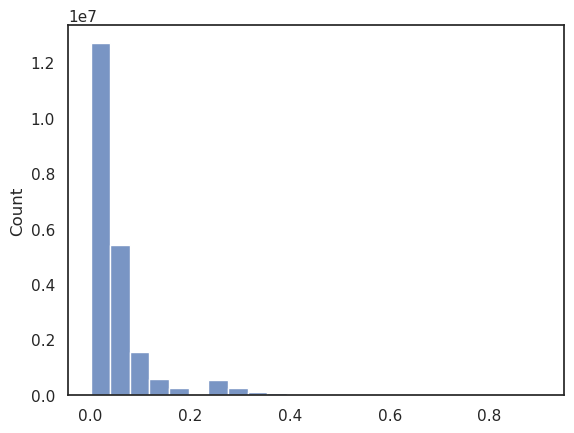

In [54]:
g = sns.histplot(missing_rate, bins=23)

In [83]:
ds_s = ds.isel(variants=(missing_rate <= 0.5))

In [95]:
ds_s["sample_cohort"] = xr.DataArray([0 if x <= 0.75 else 1 for x in df.relative_cov], dims="samples")

In [93]:
df.relative_cov, ds.sample_id.values, df.ID

(0     0.998704
 1     0.990433
 2     0.954219
 3     0.984472
 4     0.535407
 5     1.018646
 6     1.009028
 7     0.991246
 8     1.011334
 9     0.995418
 10    0.532406
 11    0.534841
 12    0.976115
 13    0.996152
 14    0.976357
 15    0.988047
 16    0.533008
 17    0.529115
 18    0.972167
 19    1.016819
 20    1.008105
 Name: relative_cov, dtype: float64,
 array(['PD_0180', 'PD_0181', 'PD_0182', 'PD_0183', 'PD_0184', 'PD_0185',
        'PD_0186', 'PD_0188', 'PD_0189', 'PD_0190', 'PD_0191', 'PD_0192',
        'PD_0193', 'PD_0194', 'PD_0195', 'PD_0196', 'PD_0197', 'PD_0198',
        'SAMN01920484', 'SAMN01920485', 'SAMN01920489'], dtype=object),
 0          PD_0180
 1          PD_0181
 2          PD_0182
 3          PD_0183
 4          PD_0184
 5          PD_0185
 6          PD_0186
 7          PD_0188
 8          PD_0189
 9          PD_0190
 10         PD_0191
 11         PD_0192
 12         PD_0193
 13         PD_0194
 14         PD_0195
 15         PD_0196
 16         P

In [84]:
ds_s = ds_s.set_index(variants=("variant_contig", "variant_position"))

In [96]:
ds_s

<xarray.Dataset> Size: 3GB
Dimensions:               (variants: 21444783, samples: 21, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/17)
    call_genotype         (variants, samples, ploidy) int8 901MB dask.array<chunksize=(999, 21, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 901MB dask.array<chunksize=(999, 21, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 450MB dask.array<chunksize=(999, 21), meta=np.ndarray>
    contig_id             (contigs) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    contig_length         (contigs) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(999,), meta=np.ndarray>
    sample_cohort         (samples) int64 168B 1 1 1 1 0 1 1 1 ... 1 1 0 0 1 1 1
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [103]:
# This doesnt work. Perform a window investigation to determine what step causes the issue.
ds_w = sg.window_by_variant(ds_s.isel(contigs = slice(0, 24)), size=10000)
sg.diversity(ds_w)["stat_diversity"][:10].values 

ValueError: Dimension 0 has 1951 blocks, adjust_chunks specified with 21465 blocks

Reload and recheck.

In [8]:
ds = sg.load_dataset("../data/Gorilla_gorilla_gorilla")
ds

<xarray.Dataset> Size: 6GB
Dimensions:               (variants: 21463034, samples: 46, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/16)
    call_genotype         (variants, samples, ploidy) int8 2GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 2GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 987MB dask.array<chunksize=(1000, 46), meta=np.ndarray>
    contig_id             (contigs) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    contig_length         (contigs) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_filter        (variants, filters) bool 43MB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [17]:
ds["sample_cohort"] = xr.DataArray(range(len(ds.samples)), dims="samples")
#ds = ds.isel(contigs=slice(0,3))
ds_w = sg.window_by_variant(ds, size=1000) #Somehow small windows works but big ones doesn't
# I think its due to chunk-sizing, but it is hard to know.
ds_d = sg.diversity(ds_w)

In [18]:
ds_d

<xarray.Dataset> Size: 24GB
Dimensions:               (windows: 21464, cohorts: 46, variants: 21463034,
                           alleles: 2, samples: 46, ploidy: 2, contigs: 3,
                           filters: 2, region_index_values: 21487,
                           region_index_fields: 6)
Dimensions without coordinates: windows, cohorts, variants, alleles, samples,
                                ploidy, contigs, filters, region_index_values,
                                region_index_fields
Data variables: (12/23)
    stat_diversity        (windows, cohorts) float64 8MB dask.array<chunksize=(1, 46), meta=np.ndarray>
    cohort_allele_count   (variants, cohorts, alleles) uint64 16GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    call_allele_count     (variants, samples, alleles) uint8 2GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    window_contig         (windows) int64 172kB 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2
    window_start          (windows) int64 172kB 0 1000 ... 21461271 21462271
    window_stop           (windows) int64 172kB 1000 2000 ... 21462271 21463034
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    sample_cohort         (samples) int64 368B 0 1 2 3 4 5 ... 40 41 42 43 44 45
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2